<a href="https://colab.research.google.com/github/navas604/Ciencia-de-Datos-en-Python/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Ciencia de Datos en Python**
## **Antonio Everardo Navas Contreras, 14003163**
## **07/04/2021**

---

## **PROYECTO**

---

### Cargar Librerías

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar Dataset, Separar en Train y Test

In [31]:
# Cargar el Dataset original

URL = "proyecto_training_data.npy"
dataset = np.load(URL) 

In [32]:
variables = list(["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
print("Descripción de variables:\n  ", variables)

Descripción de variables:
   ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


In [33]:
print(type(dataset))
print(dataset.shape)

<class 'numpy.ndarray'>
(1460, 6)


In [34]:
print(dataset[:20,])

[[208500.00 7.00 856.00 8.00 2003.00 65.00]
 [181500.00 6.00 1262.00 6.00 1976.00 80.00]
 [223500.00 7.00 920.00 6.00 2001.00 68.00]
 [140000.00 7.00 961.00 7.00 1915.00 60.00]
 [250000.00 8.00 1145.00 9.00 2000.00 84.00]
 [143000.00 5.00 796.00 5.00 1993.00 85.00]
 [307000.00 8.00 1694.00 7.00 2004.00 75.00]
 [200000.00 7.00 1107.00 7.00 1973.00 nan]
 [129900.00 7.00 1022.00 8.00 1931.00 51.00]
 [118000.00 5.00 1077.00 5.00 1939.00 50.00]
 [129500.00 5.00 1040.00 5.00 1965.00 70.00]
 [345000.00 9.00 1182.00 11.00 2005.00 85.00]
 [144000.00 5.00 912.00 4.00 1962.00 nan]
 [279500.00 7.00 1494.00 7.00 2006.00 91.00]
 [157000.00 6.00 1253.00 5.00 1960.00 nan]
 [132000.00 7.00 854.00 5.00 1929.00 51.00]
 [149000.00 6.00 1004.00 5.00 1970.00 nan]
 [90000.00 4.00 1296.00 6.00 1967.00 72.00]
 [159000.00 5.00 1114.00 6.00 2004.00 66.00]
 [139000.00 5.00 1339.00 6.00 1958.00 70.00]]


In [35]:
# Limpiar el dataset de valores "nan" y quitar notación científica

dataset = dataset[~np.isnan(dataset).any(axis=1)]

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})

In [36]:
print(type(dataset))
print(dataset.shape)

<class 'numpy.ndarray'>
(1201, 6)


In [37]:
print(dataset[:20,])

[[208500.00 7.00 856.00 8.00 2003.00 65.00]
 [181500.00 6.00 1262.00 6.00 1976.00 80.00]
 [223500.00 7.00 920.00 6.00 2001.00 68.00]
 [140000.00 7.00 961.00 7.00 1915.00 60.00]
 [250000.00 8.00 1145.00 9.00 2000.00 84.00]
 [143000.00 5.00 796.00 5.00 1993.00 85.00]
 [307000.00 8.00 1694.00 7.00 2004.00 75.00]
 [129900.00 7.00 1022.00 8.00 1931.00 51.00]
 [118000.00 5.00 1077.00 5.00 1939.00 50.00]
 [129500.00 5.00 1040.00 5.00 1965.00 70.00]
 [345000.00 9.00 1182.00 11.00 2005.00 85.00]
 [279500.00 7.00 1494.00 7.00 2006.00 91.00]
 [132000.00 7.00 854.00 5.00 1929.00 51.00]
 [90000.00 4.00 1296.00 6.00 1967.00 72.00]
 [159000.00 5.00 1114.00 6.00 2004.00 66.00]
 [139000.00 5.00 1339.00 6.00 1958.00 70.00]
 [325300.00 8.00 1158.00 9.00 2005.00 101.00]
 [139400.00 7.00 1108.00 6.00 1930.00 57.00]
 [230000.00 8.00 1795.00 7.00 2002.00 75.00]
 [129900.00 5.00 1060.00 6.00 1976.00 44.00]]


In [38]:
# Separar Train y Test

rows, columns = dataset.shape

train = dataset[0:int(rows*0.8),]
test = dataset[int(rows*0.8):,]

print("Train shape", train.shape)
print("Test shape", test.shape)

Train shape (960, 6)
Test shape (241, 6)


### Análisis Exploratorio

In [39]:
# Media, Valor Máximo, Valor Mínimo, Desviación Estándar

print("Descripción de variables: \n ", variables)
print("\n\nMedia: \n ", np.mean(train, axis=0))
print("\n\nValor Máximo: \n ", np.max(train, axis=0))
print("\n\nValor Mínimo: \n ", np.min(train, axis=0))
print("\n\nDesviación Estándar: \n ", np.std(train, axis=0))

Descripción de variables: 
  ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


Media: 
  [180935.54 6.12 1155.27 6.50 1970.60 69.97]


Valor Máximo: 
  [755000.00 10.00 3138.00 14.00 2010.00 313.00]


Valor Mínimo: 
  [34900.00 1.00 334.00 2.00 1875.00 21.00]


Desviación Estándar: 
  [83348.36 1.42 372.32 1.62 31.52 23.49]


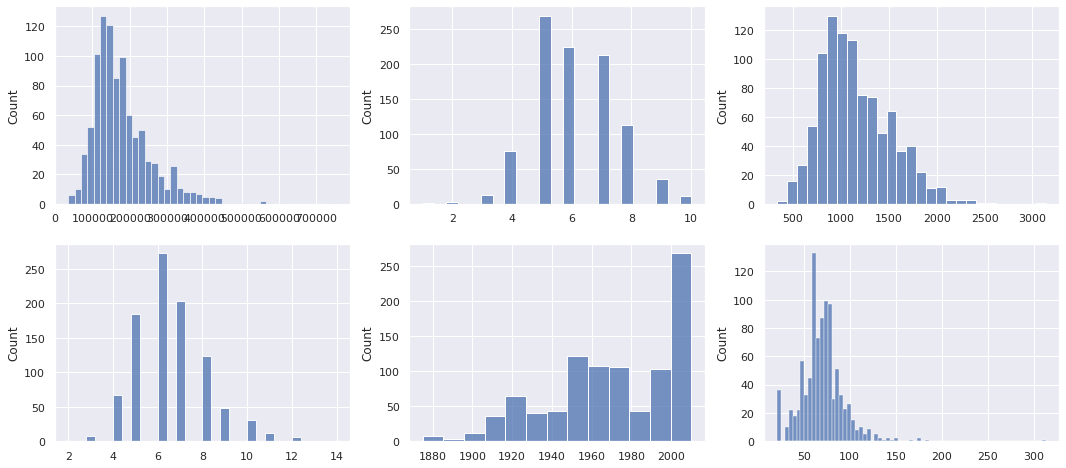

In [80]:
# Histograma de cada variable

size, axes = plt.subplots(2, 3, figsize=(18, 8))


for i in range(columns-3):
  sns.histplot(train[:,i], ax=axes[0,i])
  sns.histplot(train[:,i+3], ax=axes[1,i])

plt.show()